# What is the ratio of volume of a sphere of unit radius in hyperspace, to the volume of a hyper cube that encloses this sphere?

Using simulations, we can compute the volume of the largest hyper ball inside an n-dimensional hyper cube. We show it in this notebook

In [23]:
import numpy as np
from IPython.display import Image

In [8]:
def get_ratio(dimension, iters):
    if type(iters)!=int:
        iters=int(iters)
    rand_points = np.random.uniform(0, 1, (dimension, iters))
    dist_power = np.power(rand_points, [2]).sum(axis=0)
    inside = (dist_power<1).sum() # if dist_power > 1, dist_power ** 1/2 will also be > 1
    return inside/iters

In [5]:
%%time
get_ratio(3, 10e6)

(10000000,)
CPU times: user 1.13 s, sys: 212 ms, total: 1.34 s
Wall time: 1.35 s


0.52337690000000003

In [6]:
%%time
get_ratio(2, 1000)

(1000,)
CPU times: user 671 µs, sys: 616 µs, total: 1.29 ms
Wall time: 669 µs


0.78500000000000003

In [18]:
r=[]
for i in range(1,11):
    r.append(get_ratio(i, 10e5))
    print('Percent of the hyper cube of dims %d occupied by a hyperball inside it: %0.3f  '%(i, 100*r[-1]))

Percent of the hyper cube of dims 1 occupied by a hyperball inside it: 100.000  
Percent of the hyper cube of dims 2 occupied by a hyperball inside it: 78.477  
Percent of the hyper cube of dims 3 occupied by a hyperball inside it: 52.362  
Percent of the hyper cube of dims 4 occupied by a hyperball inside it: 30.835  
Percent of the hyper cube of dims 5 occupied by a hyperball inside it: 16.398  
Percent of the hyper cube of dims 6 occupied by a hyperball inside it: 8.034  
Percent of the hyper cube of dims 7 occupied by a hyperball inside it: 3.704  
Percent of the hyper cube of dims 8 occupied by a hyperball inside it: 1.605  
Percent of the hyper cube of dims 9 occupied by a hyperball inside it: 0.651  
Percent of the hyper cube of dims 10 occupied by a hyperball inside it: 0.243  


In [22]:
for n,i in enumerate(r):
    print(n+1, i * 2**(n+1))


1 2.0
2 3.139084
3 4.188944
4 4.933536
5 5.2472
6 5.14176
7 4.741504
8 4.11008
9 3.334144
10 2.484224


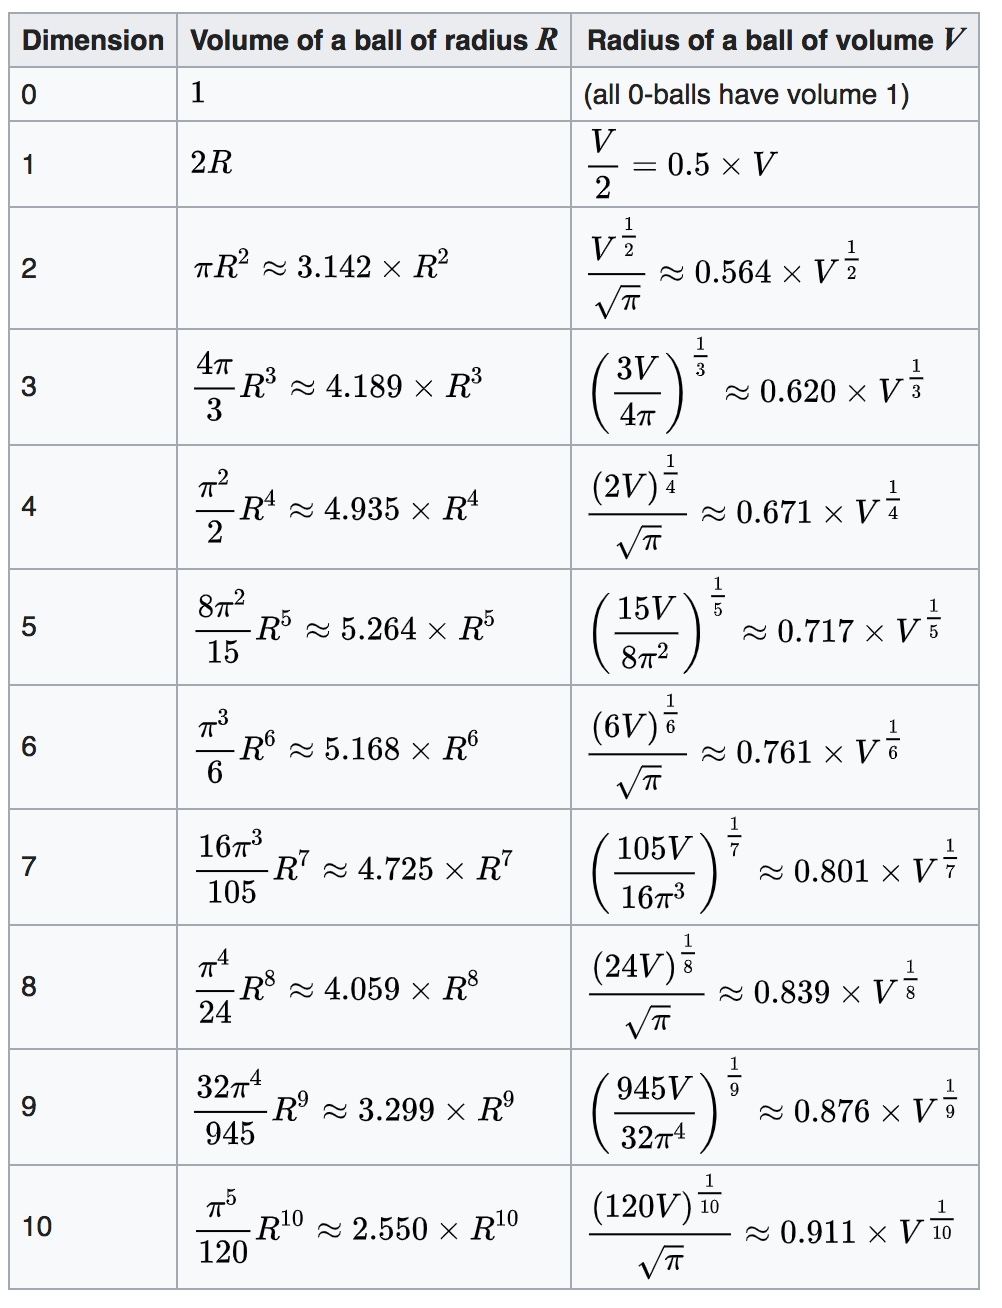

In [34]:
Image('hyperball_vol.jpeg', width=400, height = 300)

Above image is taken from following [wikipedia link](https://en.wikipedia.org/wiki/Volume_of_an_n-ball#Low_dimensions). We can see that the ratios from second column are matching quite well with our data. So the simulation approach can be considered giving good results.

We can see that for 10 dimensions, only 0.24% of the volume is occupied by the hypercube, while the same is 78% for a two dimensional circle. This gives a sense of how our intuition about lower dimensions go haywire in high dimensions, and how the data is scattered all around in a high dimensional space